In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np
print("Current working directory:", os.getcwd())

Current working directory: /Users/matiaslein/Desktop/Proyecto-final-ML/entrenamientos_df_intermedio


In [16]:
# Cargar dataset
df = pd.read_csv('../datasetintermedio.csv')

# Separar variables
y = df['Precio_usd']
X = df.drop(columns=['Precio_usd'])

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:

# Entrenar modelo de regresión
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Predicción y evaluación
y_pred = modelo.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 3126.476989839181
R2: 0.8275094797650512


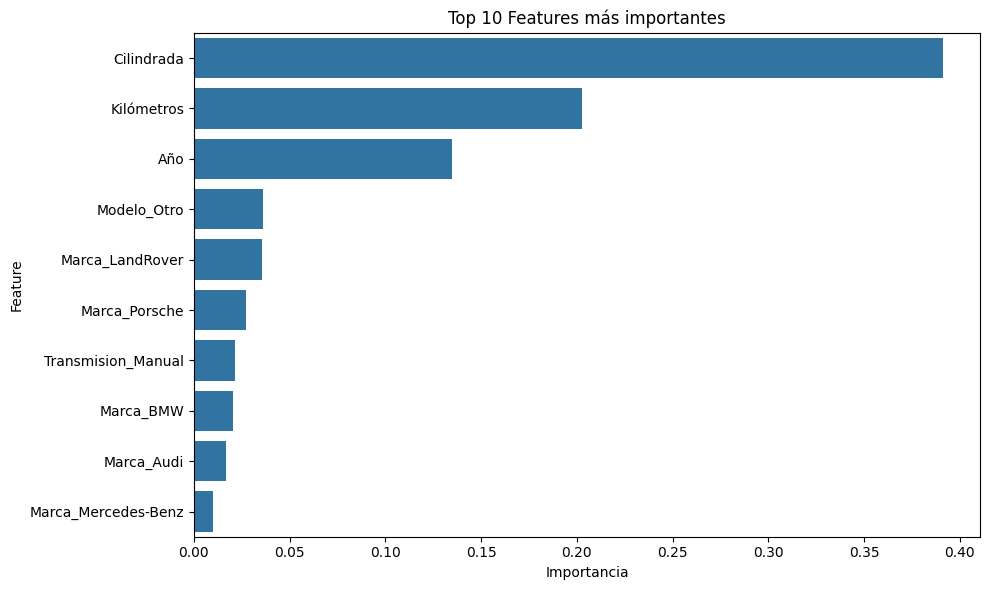

                    Transmision_Manual  Cilindrada  Precio_usd
Transmision_Manual            1.000000   -0.011033   -0.368809
Cilindrada                   -0.011033    1.000000    0.267238
Precio_usd                   -0.368809    0.267238    1.000000


In [ ]:
importancias = modelo.feature_importances_
features = X.columns

# Crear DataFrame de importancia
importancia_df = pd.DataFrame({'Feature': features, 'Importancia': importancias})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Feature', data=importancia_df.head(10))
plt.title("Top 10 Features más importantes")
plt.tight_layout()
plt.show()

print(df[['Transmision_Manual', 'Cilindrada', 'Precio_usd']].corr())

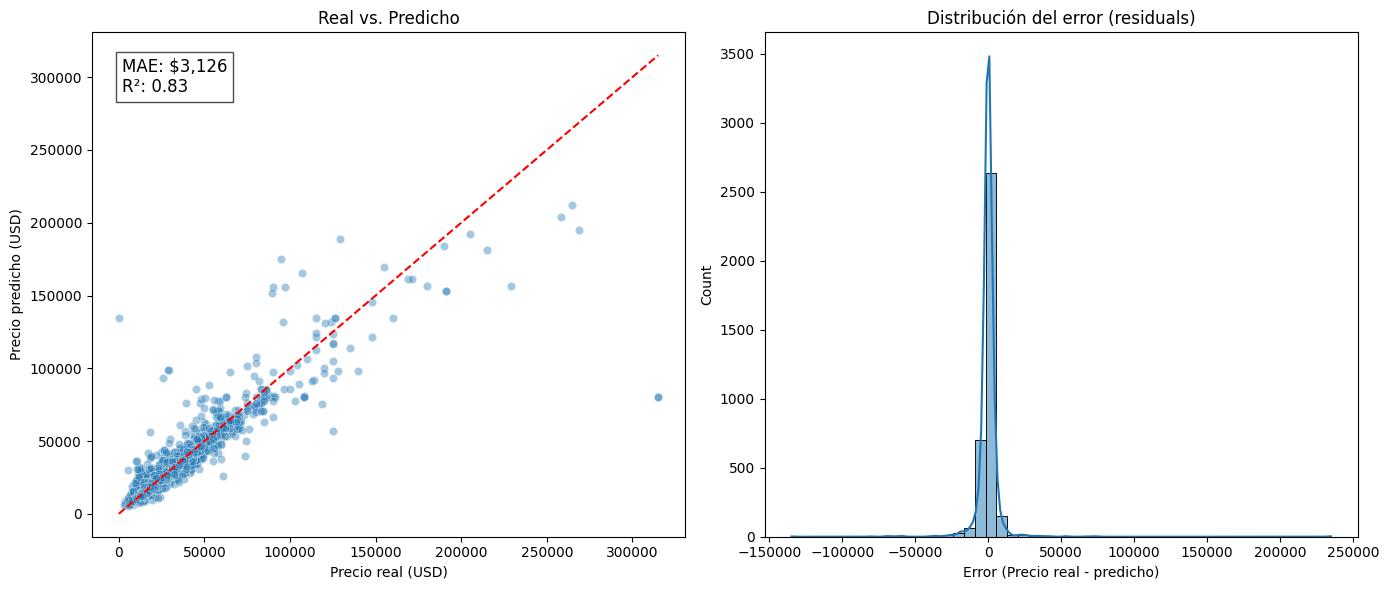

In [ ]:
# Calcular errores y métricas
errores = y_test - y_pred
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Real vs Predicho
sns.scatterplot(ax=axes[0], x=y_test, y=y_pred, alpha=0.4)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
axes[0].set_title("Real vs. Predicho")
axes[0].set_xlabel("Precio real (USD)")
axes[0].set_ylabel("Precio predicho (USD)")

# Añadir texto con métricas
texto = f"MAE: ${mae:,.0f}\nR²: {r2:.2f}"
axes[0].text(0.05, 0.95, texto, transform=axes[0].transAxes,
             fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Gráfico 2: Histograma de errores
sns.histplot(errores, bins=50, kde=True, ax=axes[1])
axes[1].set_title("Distribución del error (residuals)")
axes[1].set_xlabel("Error (Precio real - predicho)")

plt.tight_layout()
plt.show()
